In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import pandas as pd
import pprint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import csv
import json
import seaborn as sns
from scipy import stats
from scipy.ndimage.filters import gaussian_filter

mpl.rcParams['figure.dpi'] = 144
mpl.rcParams['figure.figsize'] = (10, 7)

DATAFRAME_DIR = "/Users/jeremygordon/Google Drive/Academic/# UC Berkeley ISchool PhD/Research/# Current/Covert Embodied Choice/DataFrames"

## Load data frames (generated by build_dfs.ipynb)

In [2]:
trial_df = pd.read_pickle(DATAFRAME_DIR + '/trial_df.pickle')
tracking_df = pd.read_pickle(DATAFRAME_DIR + '/tracking_df.pickle')
fixation_df = pd.read_pickle(DATAFRAME_DIR + '/fixation_df.pickle')
subject_df = pd.read_pickle(DATAFRAME_DIR + '/subject_df.pickle')
with open("../ExperimentData/hands.json") as f:
    HANDS = json.load(f)

## Analyses

In [3]:
tracking_df

,hmd_yaw,hmd_roll,hmd_pitch,hmd_x,hmd_y,hmd_z,ctr_yaw,ctr_roll,ctr_pitch,ctr_x,...,gaze_or_z,gaze_dir_x,gaze_dir_y,gaze_dir_z,gaze_tgt_x,gaze_tgt_y,gaze_tgt_z,gaze_conv_dist,blinking,ts
1580931438_1580931438.929,-0.031462,1.095044,-0.075322,-0.052321,0.521060,0.013541,0.0,0.0,0.0,0.0,...,0.899598,0.423388,0.057428,0.904113,0.213002,0.708542,1.725711,0.913727,False,1.580931e+09
1580931438_1580931438.984,-0.031462,1.095044,-0.075322,-0.052321,0.521060,0.013541,0.0,0.0,0.0,0.0,...,0.900421,0.419140,0.049654,0.906545,3.134867,1.048171,8.059408,7.897001,False,1.580931e+09
1580931438_1580931441.661,-0.032770,1.094553,-0.076983,-0.053092,0.520863,0.013231,0.0,0.0,0.0,0.0,...,0.895066,0.913150,0.086408,0.398323,0.226751,0.694841,1.067670,0.433327,False,1.580931e+09
1580931438_1580931441.696,-0.033468,0.497429,-0.164093,-0.085703,0.247288,0.004624,0.0,0.0,0.0,0.0,...,0.906575,0.905972,0.084475,0.414803,0.192322,0.693088,1.077316,0.411619,False,1.580931e+09
1580931438_1580931441.710,-0.040371,0.843597,-0.150228,-0.090585,0.411369,0.018840,0.0,0.0,0.0,0.0,...,0.903208,0.906337,0.085553,0.413772,0.189004,0.692931,1.069928,0.402928,False,1.580931e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580938581_1580939328.172,-0.025765,0.102218,0.126509,0.064116,0.052211,-0.016287,0.0,0.0,0.0,0.0,...,1.318277,0.066298,-0.738152,0.671359,-0.051557,0.687709,1.411361,0.138649,True,1.580939e+09
1580938581_1580939328.184,-0.027048,0.103351,0.123754,0.062782,0.052788,-0.016896,0.0,0.0,0.0,0.0,...,1.312671,0.061691,-0.744357,0.664919,-0.051617,0.648802,1.438712,0.189560,True,1.580939e+09
1580938581_1580939328.195,-0.028464,0.104061,0.120185,0.061038,0.053145,-0.017534,0.0,0.0,0.0,0.0,...,1.307265,0.060370,-0.753756,0.654362,-0.039697,0.491036,1.566590,0.396301,True,1.580939e+09
1580938581_1580939328.207,-0.029870,0.105133,0.116588,0.059285,0.053681,-0.018177,0.0,0.0,0.0,0.0,...,1.300888,0.058294,-0.753406,0.654944,-0.042977,0.531798,1.524872,0.341989,True,1.580939e+09


In [13]:
cols = tracking_df.columns

tracking_df[cols].mean()

hmd_yaw          -1.729043e-02
hmd_roll          9.876150e-02
hmd_pitch         7.589297e-02
hmd_x             3.832059e-02
hmd_y             4.701169e-02
hmd_z            -7.097529e-03
ctr_yaw           0.000000e+00
ctr_roll          0.000000e+00
ctr_pitch         0.000000e+00
ctr_x             0.000000e+00
ctr_y             0.000000e+00
ctr_z             0.000000e+00
gaze_or_x        -5.997037e-02
gaze_or_y         6.416848e-01
gaze_or_z         1.116028e+00
gaze_dir_x        1.391852e-01
gaze_dir_y       -1.858748e-01
gaze_dir_z        7.378985e-01
gaze_tgt_x        3.347910e-02
gaze_tgt_y        4.814762e-01
gaze_tgt_z        1.492438e+00
gaze_conv_dist    3.921808e-01
blinking          1.195167e-01
ts                1.580935e+09
dtype: float64

In [12]:
trial_df

,subject_choice,trial_id,points,correct,avoided_prediction,ts_start,ts_selection,ts_end,hand,practice,with_adversary,duration
1580931438_1,0,1,0,False,False,1.580931e+09,1.580932e+09,1.580932e+09,"{'table': ['1d', '1s'], 'priv': ['1o', '1s'], ...",True,False,113
1580931438_2,0,2,0,False,False,1.580932e+09,1.580932e+09,1.580932e+09,"{'table': ['2s', '2d'], 'priv': ['1o', '3s'], ...",True,False,33
1580931438_3,0,3,1,True,False,1.580932e+09,1.580932e+09,1.580932e+09,"{'table': ['2s', '1s'], 'priv': ['3d', '1o'], ...",True,False,21
1580931438_4,1,4,1,True,False,1.580932e+09,1.580932e+09,1.580932e+09,"{'table': ['3d', '3s'], 'priv': ['2d', '1o'], ...",True,False,15
1580931438_5,1,5,1,True,False,1.580932e+09,1.580932e+09,1.580932e+09,"{'table': ['1d', '3d'], 'priv': ['2s', '1o'], ...",False,False,18
...,...,...,...,...,...,...,...,...,...,...,...,...
1580938581_43,1,43,1,True,True,1.580939e+09,1.580939e+09,1.580939e+09,"{'table': ['3o', '2o'], 'priv': ['1s', '3d'], ...",False,True,12
1580938581_44,1,44,1,True,True,1.580939e+09,1.580939e+09,1.580939e+09,"{'table': ['1d', '1s'], 'priv': ['2o', '3d'], ...",False,True,11
1580938581_45,1,45,0,True,False,1.580939e+09,1.580939e+09,1.580939e+09,"{'table': ['2s', '2o'], 'priv': ['2s', '2d'], ...",False,True,11
1580938581_46,1,46,0,True,False,1.580939e+09,1.580939e+09,1.580939e+09,"{'table': ['3o', '2o'], 'priv': ['2d', '2s'], ...",False,True,11


In [10]:
fixation_df

,objectName,start_ts,stop_ts,duration
1580931438_1580931856.920,CardOnTable1,1.580932e+09,1.580932e+09,0.829140
1580931438_1580931857.761,CardOnTable1,1.580932e+09,1.580932e+09,0.020943
1580931438_1580931872.055,CardOnTable1,1.580932e+09,1.580932e+09,0.220411
1580931438_1580931872.482,CardOnTable1,1.580932e+09,1.580932e+09,0.604384
1580931438_1580931902.929,CardOnTable1,1.580932e+09,1.580932e+09,0.644432
1580931438_1580931932.891,CardOnTable1,1.580932e+09,1.580932e+09,0.335613
1580931438_1580932006.445,CardOnTable0,1.580932e+09,1.580932e+09,0.460544
1580931438_1580932006.929,CardOnTable0,1.580932e+09,1.580932e+09,0.008975
1580931438_1580932006.961,CardOnTable0,1.580932e+09,1.580932e+09,0.009974
1580931438_1580932007.085,CardOnTable0,1.580932e+09,1.580932e+09,0.326129


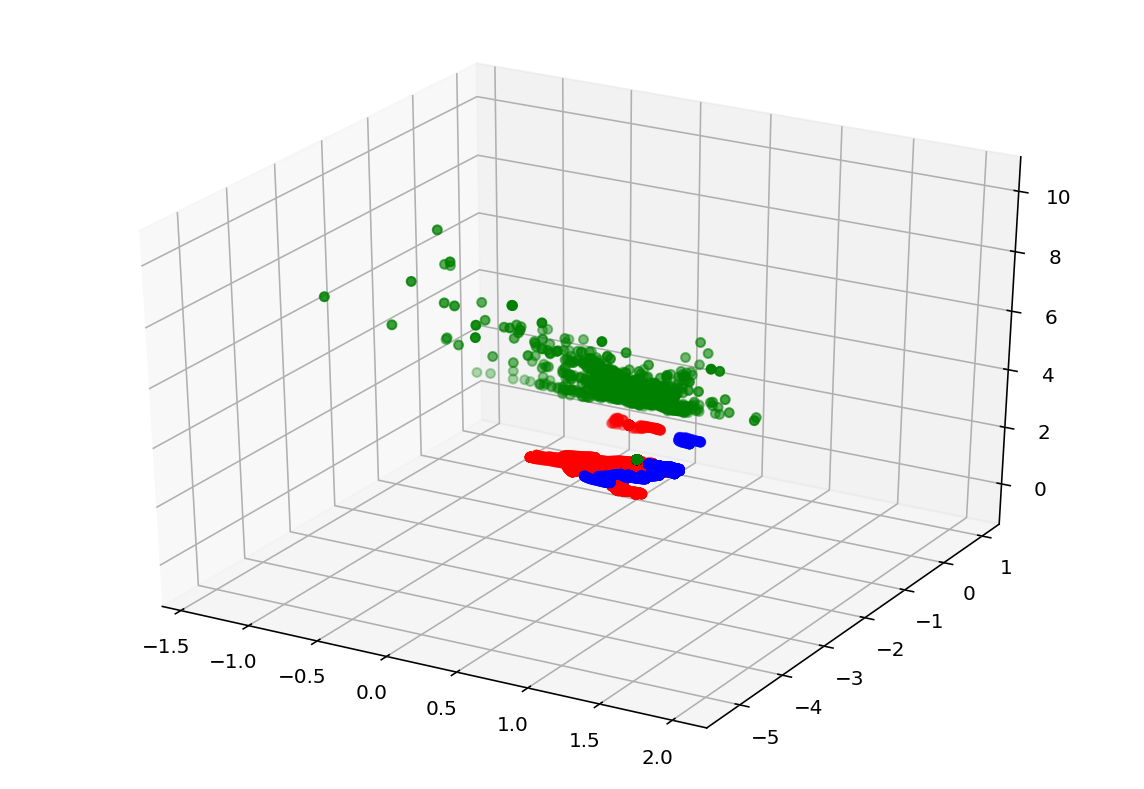

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tracking_df['hmd_x'], tracking_df['hmd_y'], tracking_df['hmd_z'], c='blue')
ax.scatter(tracking_df['ctr_x'], tracking_df['ctr_y'], tracking_df['ctr_z'], c='red')
ax.scatter(tracking_df['gaze_tgt_x'], tracking_df['gaze_tgt_y'], tracking_df['gaze_tgt_z'], c='green')